<a href="https://colab.research.google.com/github/ColinMMahoney/MachineLearning/blob/main/knn_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConcl", "fAsym", "fM3Long", "fM3Trans", "fAplha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'magic04.data'

In [ ]:
df["class"] = (df["class"] == "g").astype(int)

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAplha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


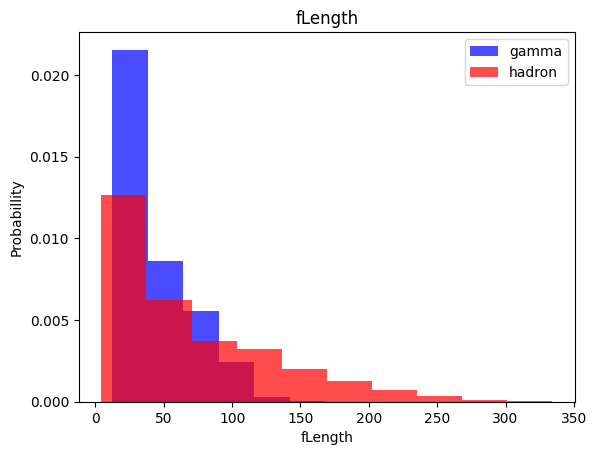

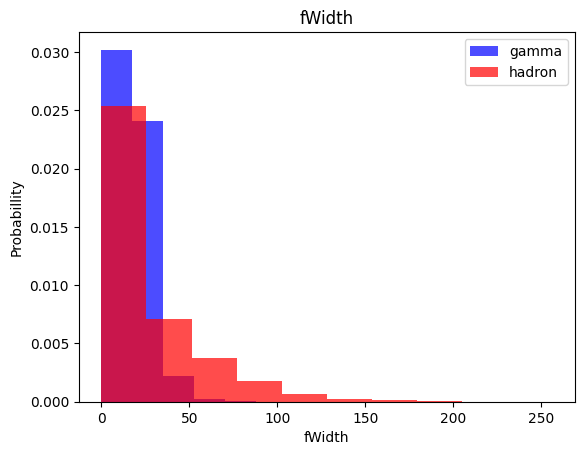

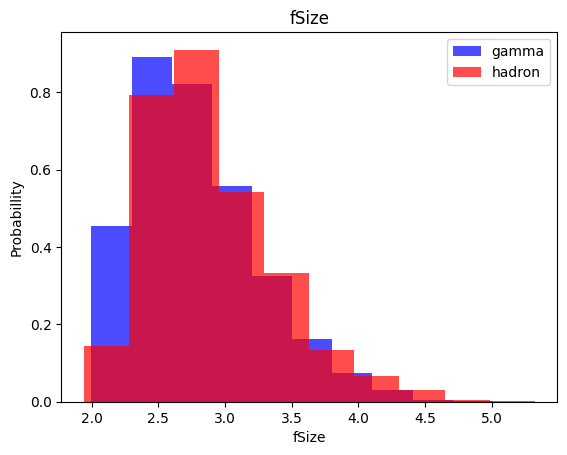

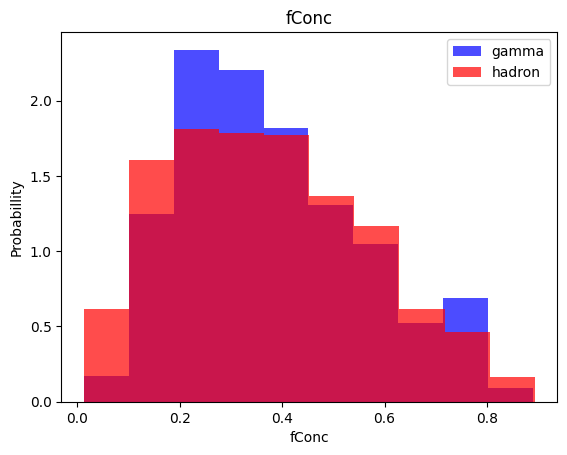

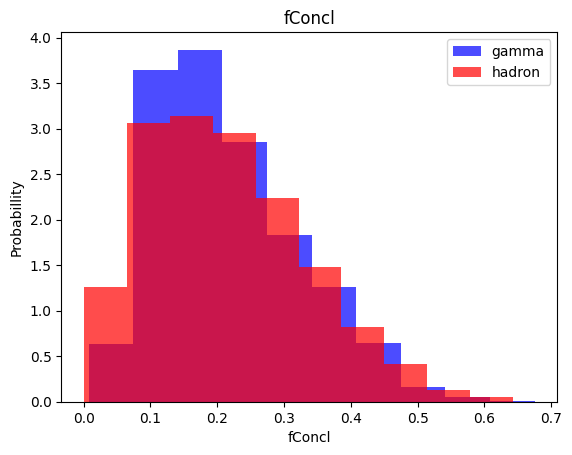

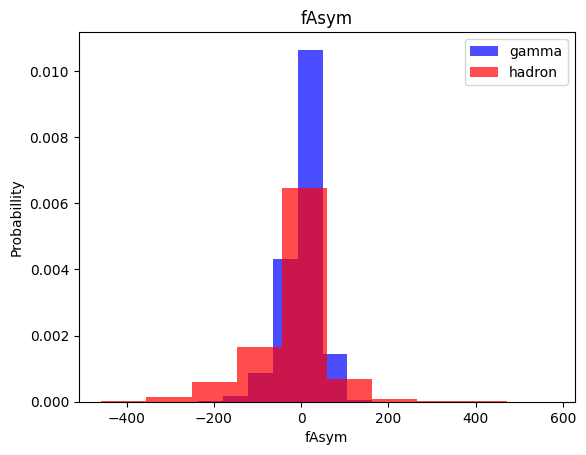

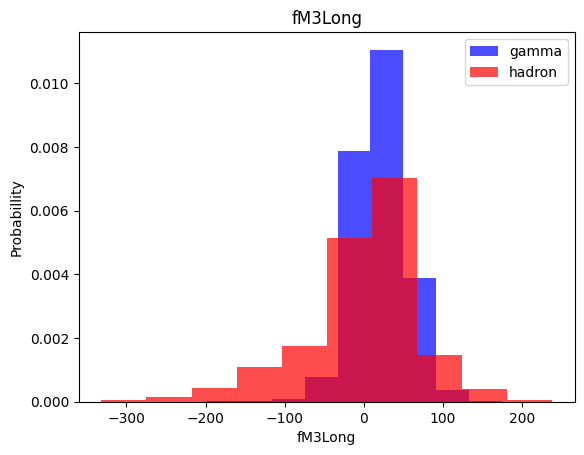

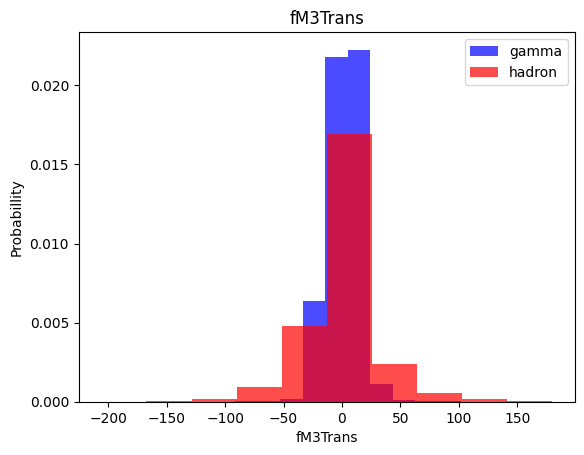

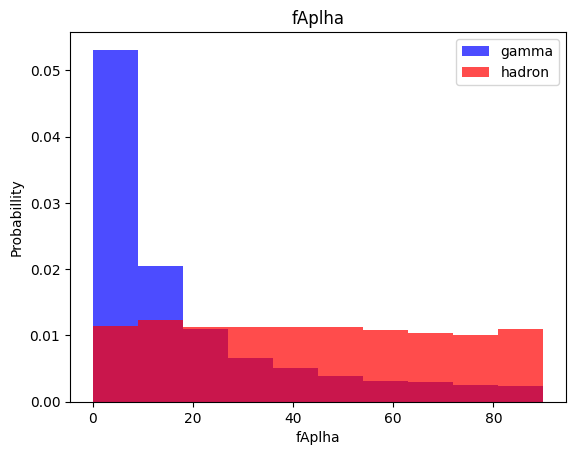

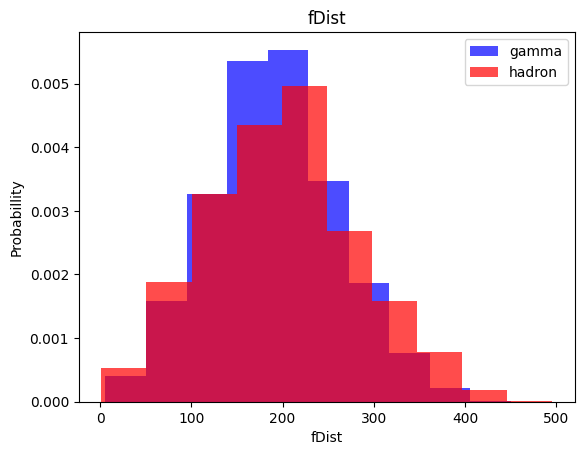

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probabillity")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
train, vaild, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int (0.8*len(df))])

In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1,1))))

  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
vaild, X_vaild, y_vaild = scale_dataset(vaild, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=150)
knn_model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

NameError: name 'classification_report' is not defined